Spotify API Project Carson Bauer 10/11/2024

This project is my second attempt at using the Spotify API. The first attempt was to use the get artist's albums and the multi-albums endpoints in order to build a fuller discography within the notebook. However, this was unsuccessful, so by using the top tracks endpoint I aim to answer the same question.

My hypothesis (which would be better suited to a larger data set, as I can already see some flaws when looking at just the track names) is that David Bowie's popular songs are more likely to have a low instrumentality and a high energy. Bowie has some instrumental and kind of ambient tracks in his discography. They are bad. Even the "sadder" songs on his top tracks that might score low on valence have a "power" to them, so I think their energy value would still be relatively high. 

In [84]:
import urllib
import requests
import pandas as pd
import json
import base64

In [85]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                   encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    
    response = requests.post(url,
                            data = data,
                            headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [86]:
keys = pd.read_csv(r"C:\Users\gamec\Desktop\School\Data in Emat\Client_ID,Client_Secret.txt")

In [87]:
#keys

In [88]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [89]:
access_token

'BQCHXHPr5Fjr0ZCpVBJAjQ4xo-qZdlS1KpR1DTLR3WmIvUBr3VnKGLMctYD0KFudiFKZIEsU-hcupndO_7yHyiQ1U5U4RFmRFFlYbjEdP2V03QXqXhQ'

In [90]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks/'
# ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'
# all_ab = 'https://api.spotify.com/v1/{}/albums/'
# get_artist = 'https://api.spotify.com/v1/artists/{}'
top_tracks = "https://api.spotify.com/v1/artists/{}/top-tracks"

In [91]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [92]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [93]:
db_artist_id = '0oSGxfWSnnOXhD2fKuz2Gy'

In [94]:
db_artist_id

'0oSGxfWSnnOXhD2fKuz2Gy'

This is the part where I deviate from the in-class example. The top tracks endpoint returns the track name, id, and a popularity variable. The documentation says that it's a value between 0 and 100, but the calculation is not just based on the total number of plays. It also involves the recent number of plays. But later on I see that even on the Spotify homepage, songs aren't listed according to the popularity value but by the total number of streams, which isn't pulled by the API.

In [95]:
top_tracks.format(db_artist_id)

'https://api.spotify.com/v1/artists/0oSGxfWSnnOXhD2fKuz2Gy/top-tracks'

In [96]:
db_discog_response = api_call(top_tracks.format(db_artist_id), session_header)

200


In [97]:
# db_discog_response

In [113]:
db_discog_df = pd.DataFrame(db_discog_response['tracks'])
# db_discog_df

In [99]:
db_track_ids = ','.join(db_discog_df['id'].to_list())

In [100]:
t_features_ep + '?ids={}'.format(db_track_ids)

'https://api.spotify.com/v1/audio-features?ids=4okLKeB83VLZFGGtrMQxpd,0pQskrTITgmCMyr85tb9qq,7Jh1bpe76CNTCgdgAdBw4Z,72Z17vmmeQKAg8bptWvpVG,0LrwgdLsFaWh9VXIjBRe8t,2EC9IJj7g0mN1Q5VrZkiYY,3ix6K4wZY29bCujrSznwFZ,3ZE3wv8V3w2T2f7nOCjV0N,3gxEZXUjrNbl3TlSrTGbR5,6mib3N4E8PZHAGQ3xy7bho'

In [101]:
db_track_features = api_call(t_features_ep + '?ids={}'.format(db_track_ids), session_header)

200


In [102]:
db_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(db_track_ids), session_header)
# db_track_info

200


Here is where I failed with the first project. Calling the get all albums endpoint gives the album IDs, but not the track IDs. Then, running it through the multi-albums endpoint gives the track ids, but they are all in one column. I should have been able to use list comprehension to get to the track id, but since the album id and the track ids were all stored under 'id' I couldn't figure out how to target the right one, to then find the track features of.

In [103]:
db_features_df = pd.DataFrame(db_track_features['audio_features'])
# db_features_df.head()

In [104]:
db_tracks_df = pd.DataFrame(db_track_info['tracks'])

In [105]:
db_merged = pd.merge(db_features_df, db_tracks_df, how = 'inner', on = 'id')

In [106]:
# db_merged.columns

In [107]:
db_merged['album'][0]

{'album_type': 'compilation',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0oSGxfWSnnOXhD2fKuz2Gy'},
   'href': 'https://api.spotify.com/v1/artists/0oSGxfWSnnOXhD2fKuz2Gy',
   'id': '0oSGxfWSnnOXhD2fKuz2Gy',
   'name': 'David Bowie',
   'type': 'artist',
   'uri': 'spotify:artist:0oSGxfWSnnOXhD2fKuz2Gy'}],
 'external_urls': {'spotify': 'https://open.spotify.com/album/1jdQFC3s8PZUc5i7vovZTv'},
 'href': 'https://api.spotify.com/v1/albums/1jdQFC3s8PZUc5i7vovZTv',
 'id': '1jdQFC3s8PZUc5i7vovZTv',
 'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b273a47e80463147d1877608d56b',
   'width': 640,
   'height': 640},
  {'url': 'https://i.scdn.co/image/ab67616d00001e02a47e80463147d1877608d56b',
   'width': 300,
   'height': 300},
  {'url': 'https://i.scdn.co/image/ab67616d00004851a47e80463147d1877608d56b',
   'width': 64,
   'height': 64}],
 'is_playable': True,
 'name': 'Best of Bowie',
 'release_date': '2002',
 'release_date_precision': 'year',
 'total_trac

Even after running that ['album'] I still don't fully understand how the data is being stored. It would likely require some list comprehension to get the album name and then append it to the dataframe, but since that's where I failed with my first attempt I'm deciding to give it a rest for now.

In [108]:
db_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.678,0.643,2,-9.316,1,0.0444,0.240000,0.000000,0.0708,0.534,...,{'spotify': 'https://open.spotify.com/track/4o...,https://api.spotify.com/v1/tracks/4okLKeB83VLZ...,False,True,Under Pressure,45,https://p.scdn.co/mp3-preview/69d1bd46acbb407b...,13,track,spotify:track:4okLKeB83VLZFGGtrMQxpd
1,0.486,0.449,5,-10.298,1,0.0267,0.166000,0.000002,0.5400,0.549,...,{'spotify': 'https://open.spotify.com/track/0p...,https://api.spotify.com/v1/tracks/0pQskrTITgmC...,False,True,Starman - 2012 Remaster,77,https://p.scdn.co/mp3-preview/6b0a9731bccd31ce...,4,track,spotify:track:0pQskrTITgmCMyr85tb9qq
2,0.489,0.758,7,-6.491,1,0.0297,0.000678,0.490000,0.0920,0.435,...,{'spotify': 'https://open.spotify.com/track/7J...,https://api.spotify.com/v1/tracks/7Jh1bpe76CNT...,False,True,Heroes - 2017 Remaster,73,https://p.scdn.co/mp3-preview/9c4ff8b06fa3aa92...,3,track,spotify:track:7Jh1bpe76CNTCgdgAdBw4Z
3,0.310,0.403,0,-13.664,1,0.0326,0.072600,0.000093,0.1390,0.466,...,{'spotify': 'https://open.spotify.com/track/72...,https://api.spotify.com/v1/tracks/72Z17vmmeQKA...,False,True,Space Oddity - 2015 Remaster,69,https://p.scdn.co/mp3-preview/9240f576fa464f8e...,1,track,spotify:track:72Z17vmmeQKAg8bptWvpVG
4,0.559,0.308,0,-11.750,1,0.0376,0.505000,0.000000,0.1090,0.414,...,{'spotify': 'https://open.spotify.com/track/0L...,https://api.spotify.com/v1/tracks/0LrwgdLsFaWh...,False,True,Changes - 2015 Remaster,68,https://p.scdn.co/mp3-preview/169c24f8dec808a5...,1,track,spotify:track:0LrwgdLsFaWh9VXIjBRe8t


In [109]:
db_merged_popularity = db_merged.filter(['popularity'], axis = 1)

<Axes: >

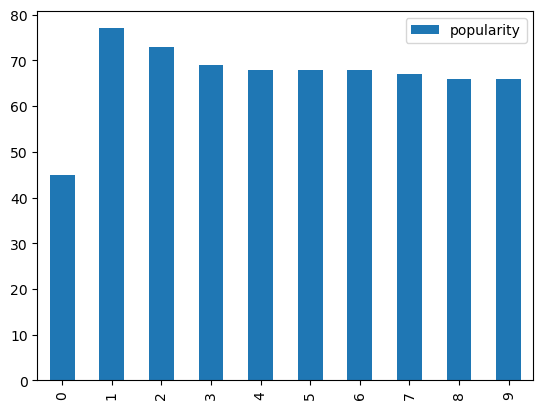

In [110]:
db_merged_popularity.plot.bar()

This is what I mean about being a little confused about how the popularity works. Track 0 (Under Pressure) has a much lower popularity value than the others. But looking at David Bowie's Spotify page, it has nearly four times the streams as the track listed under it. So the way that popular tracks are pulled is the same, but I don't understand how it's ranked since the total number of streams aren't included as a column.

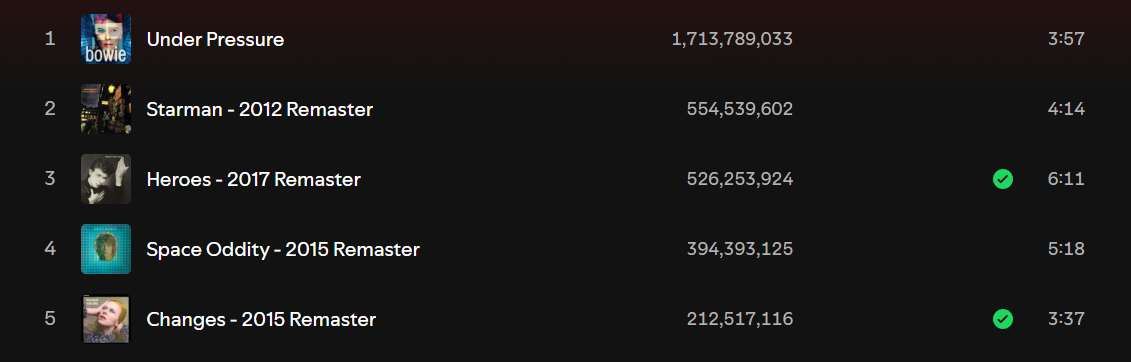

In [111]:
db_merged_final = db_merged.filter(['instrumentalness','energy','name'], axis=1)

^ Tired of messing around with the .plot function so I just created a second dataframe that only contained what I needed.

<Axes: >

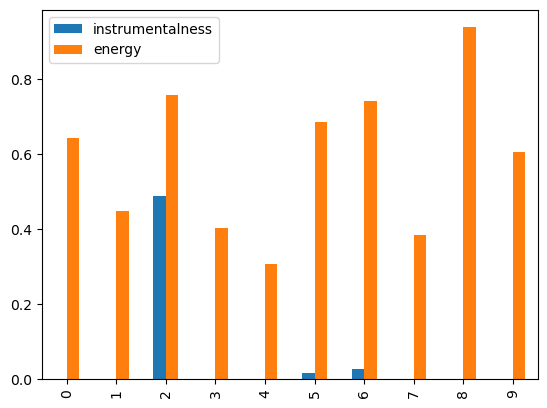

In [112]:
db_merged_final.plot.bar()

My hypothesis was slightly off-base. Looking at the chart I was shocked by how correct I was, but after thinking about how the highest value on the Y-axis was only 0.8, that means most of the tracks' energy is around 0.5. Would definitely be a better chart if I could stretch the Y axis up to 1.0 to keep it in scale. The instrumentalness was mostly correct however. All of the solutions I found to get the song names onto the X axis involved matplotlib, but after looking back on the dataframe, the song with that high instrumentalness value is Heroes, which makes sense.